In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import castep_isotope_sub
import alpha_plotting
import ionic_model



In [2]:
r_coefs_melt_dekoker = [1.9613, -0.00165, 0.0000019]
r_coefs_melt_fudge =   [2.0909, -0.00165, 0.0000019]

forsterite_r_0 = 2.1170E-10

beta_dek_lq = ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                         ionic_model.melt_bond_length(0, r_coefs_melt_dekoker)),1573.0)
beta_fudge_lq = ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                         ionic_model.melt_bond_length(0, r_coefs_melt_fudge)),1573.0)
beta_fo = ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                         forsterite_r_0),1573.0)

print("Reduced frac factor liquid de Koker:", beta_dek_lq, "per mil")
print("Reduced frac factor liquid r fudge:", beta_fudge_lq, "per mil")
print("Reduced frac factor forsterite r:", beta_fo, "per mil")
print("Fractionation factor de Koker - fo:", beta_fo - beta_dek_lq, "per mil")
print("Fractionation factor fudge - fo:", beta_fo - beta_fudge_lq, "per mil")

meaured_alpha = 0.080
target_beta = meaured_alpha + beta_fo
k_corr = ionic_model.calculate_force_constant_correction(target_beta,
                                                 r_coefs_melt_dekoker, 1573.0) 
print("We need to scale the force constant by a factor of:", k_corr)

print("Shift corrected beta:", ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                 ionic_model.melt_bond_length(0, r_coefs_melt_dekoker),
                 correction=k_corr), 1573.0))
print("Shift corrected alpha:", beta_fo - ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                 ionic_model.melt_bond_length(0, r_coefs_melt_dekoker),
                 correction=k_corr), 1573.0))

k_shift = ionic_model.calculate_force_constant_correction(target_beta,
                                                 r_coefs_melt_dekoker, 1573.0, mode='offset') 
print("Or we need to shift the force constant by:", k_shift, "N/m")
print("Shift corrected beta:", ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                 ionic_model.melt_bond_length(0, r_coefs_melt_dekoker),
                 offset=k_shift), 1573.0))
print("Shift corrected alpha:", beta_fo - ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                 ionic_model.melt_bond_length(0, r_coefs_melt_dekoker),
                 offset=k_shift), 1573.0))

Reduced frac factor liquid de Koker: 2.5482538142545414 per mil
Reduced frac factor liquid r fudge: 2.1036406967518073 per mil
Reduced frac factor forsterite r: 2.026867945925752 per mil
Fractionation factor de Koker - fo: -0.5213858683287893 per mil
Fractionation factor fudge - fo: -0.07677275082605517 per mil
We need to scale the force constant by a factor of: 0.8266063742327929
Shift corrected beta: 2.106867945925502
Shift corrected alpha: -0.07999999999975005
Or we need to shift the force constant by: -233.30062664584247 N/m
Shift corrected beta: 2.106867945925724
Shift corrected alpha: -0.07999999999997165


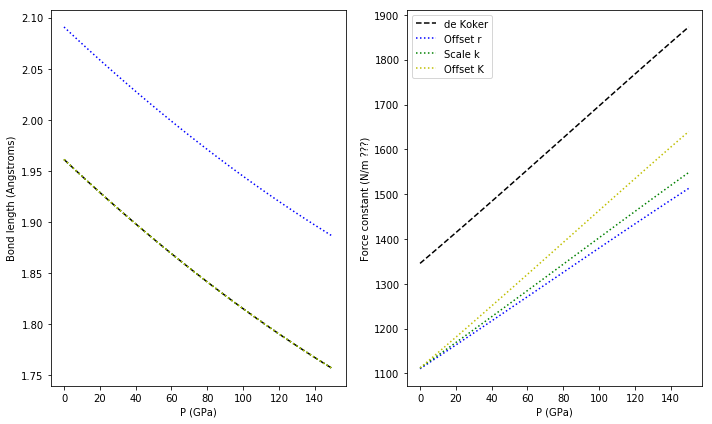

In [3]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

# Plot r and force constant as function of P
ionic_model.plot_force_constants(np.linspace(0, 150, num=100),
                         [r_coefs_melt_dekoker, r_coefs_melt_fudge, r_coefs_melt_dekoker,r_coefs_melt_dekoker],
                         names=['de Koker', 'Offset r', 'Scale k', 'Offset K'], 
                         kcorrs=[1,1,k_corr,1],
                         offsets=[0,0,0,k_shift],
                         styles=['--',':', ':', ':'],
                         colors=['k', 'b', 'g', 'y'])

In [4]:
# It seems the thing to do is to plot the fractionation between olivine and the different melts
# at 1573 K as a function of pressure... this cell works out the betas

t = 1573.0 # K
ps = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # GPa

# r for forsterite. Need to match the pressures.
forsterite_r = [2.1170E-10, 2.069E-10, 2.031E-10, 2.000E-10, 1.974E-10, 1.9520E-10, 
                1.932E-10, 1.915E-10, 1.898E-10, 1.884E-10, 1.870E-10]

beta_fo = []
beta_lq = []
beta_lq_rscale = []
beta_lq_kscale = []
beta_lq_koffset = []

print(k_corr)

for i, p in enumerate(ps):
    beta_fo.append(ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                         forsterite_r[i]),t))
    beta_lq.append(ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                   ionic_model.melt_bond_length(p, r_coefs_melt_dekoker),
                   correction=1.0, offset=0.0), t))
    beta_lq_rscale.append(ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                          ionic_model.melt_bond_length(p, r_coefs_melt_fudge),
                          correction=1.0, offset=0.0), t))
    beta_lq_kscale.append(ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                          ionic_model.melt_bond_length(p, r_coefs_melt_dekoker),
                          correction=k_corr, offset=0.0), t))
    beta_lq_koffset.append(ionic_model.ionic_model_beta(ionic_model.ionic_model_force_constant(
                           ionic_model.melt_bond_length(p, r_coefs_melt_dekoker),
                           correction=1.0, offset=k_shift), t))
    
# We need arrays for plotting
beta_fo = np.array(beta_fo)
beta_lq = np.array(beta_lq)
beta_lq_rscale = np.array(beta_lq_rscale)
beta_lq_kscale = np.array(beta_lq_kscale)
beta_lq_koffset = np.array(beta_lq_koffset)

0.8266063742327929


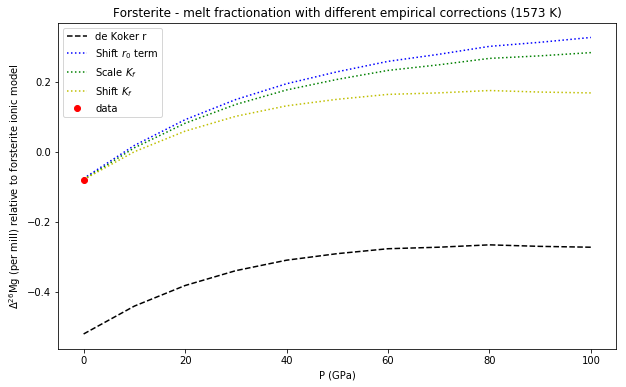

In [5]:
# Make the plot
fig, ax = plt.subplots()
ax.plot(ps, beta_fo-beta_lq, 'k--', label='de Koker r')
ax.plot(ps, beta_fo-beta_lq_rscale, 'b:', label='Shift $r_0$ term')
ax.plot(ps, beta_fo-beta_lq_kscale, 'g:', label='Scale $K_f$')
ax.plot(ps, beta_fo-beta_lq_koffset, 'y:', label='Shift $K_f$')
ax.plot(0, -0.080, 'ro', label='data')
ax.set_ylabel(r"$\Delta^{}$Mg (per mill) relative to {}".format('{26}', 'forsterite ionic model'))
ax.set_xlabel("P (GPa)")
ax.set_title('Forsterite - melt fractionation with different empirical corrections (1573 K)')
plt.legend()
plt.show()